In [1]:
import pandas as pd
import matplotlib

In [29]:
df = pd.read_csv(r"C:\Users\F\Documents\1 UM\Semester 2\group12\fer\emotion_predictions.csv")

In [30]:
# Filter dataframe for the two children
df = df[df['Face'].isin(['0.png', '1.png'])]

In [23]:
df.head(10)

,Video,Frame,Face,Emotion
0,2023-05-10 16-46-42,1,0.png,Surprise
1,2023-05-10 16-46-42,1,1.png,Neutral
3,2023-05-10 16-46-42,2,1.png,Neutral
2,2023-05-10 16-46-42,2,0.png,Surprise
4,2023-05-10 16-46-42,3,0.png,Neutral
5,2023-05-10 16-46-42,4,0.png,Neutral
6,2023-05-10 16-46-42,4,1.png,Sadness
9,2023-05-10 16-46-42,5,1.png,Neutral
8,2023-05-10 16-46-42,5,0.png,Neutral
10,2023-05-10 16-46-42,6,0.png,Neutral


In [31]:
len(df['Video'].unique())

7

In [39]:
df2 = df[df['Video'] == df['Video'].unique()[5]]
emotion_counts = df2['Emotion'].value_counts()
print(emotion_counts)

Neutral      278
Anger        140
Happiness    128
Sadness       49
Surprise      29
Fear          29
Contempt      17
Disgust       13
Name: Emotion, dtype: int64


In [40]:
negative_emotions = ['Anger', 'Sadness', 'Contempt', 'Fear', 'Disgust']

# Filter dataframe for negative emotions
negative_df = df2[df2['Emotion'].isin(negative_emotions)]

# Count negative emotions
negative_counts = negative_df['Emotion'].value_counts()
print(negative_counts)


Anger       140
Sadness      49
Fear         29
Contempt     17
Disgust      13
Name: Emotion, dtype: int64


Emotion  Anger  Contempt  Disgust  Fear  Happiness  Neutral  Sadness  Surprise
Face                                                                          
0.png       13        14        6    26         86      154       24        21
1.png      127         3        7     3         42      124       25         8


<AxesSubplot:xlabel='Face'>

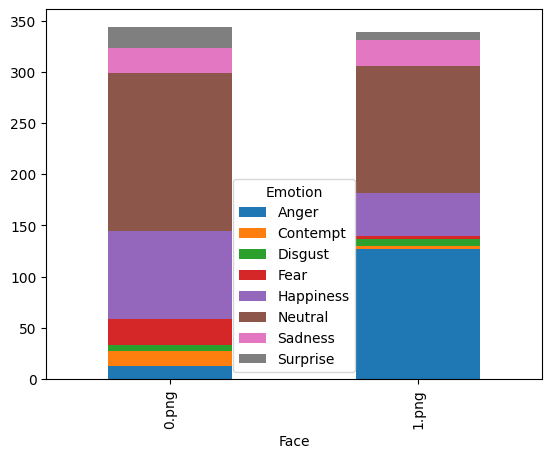

In [41]:
# Face counts for each child
face_emotion_counts = df2.groupby(['Face', 'Emotion']).size().unstack().fillna(0)
print(face_emotion_counts)

# Plot emotions for each child
face_emotion_counts.plot(kind='bar', stacked=True)


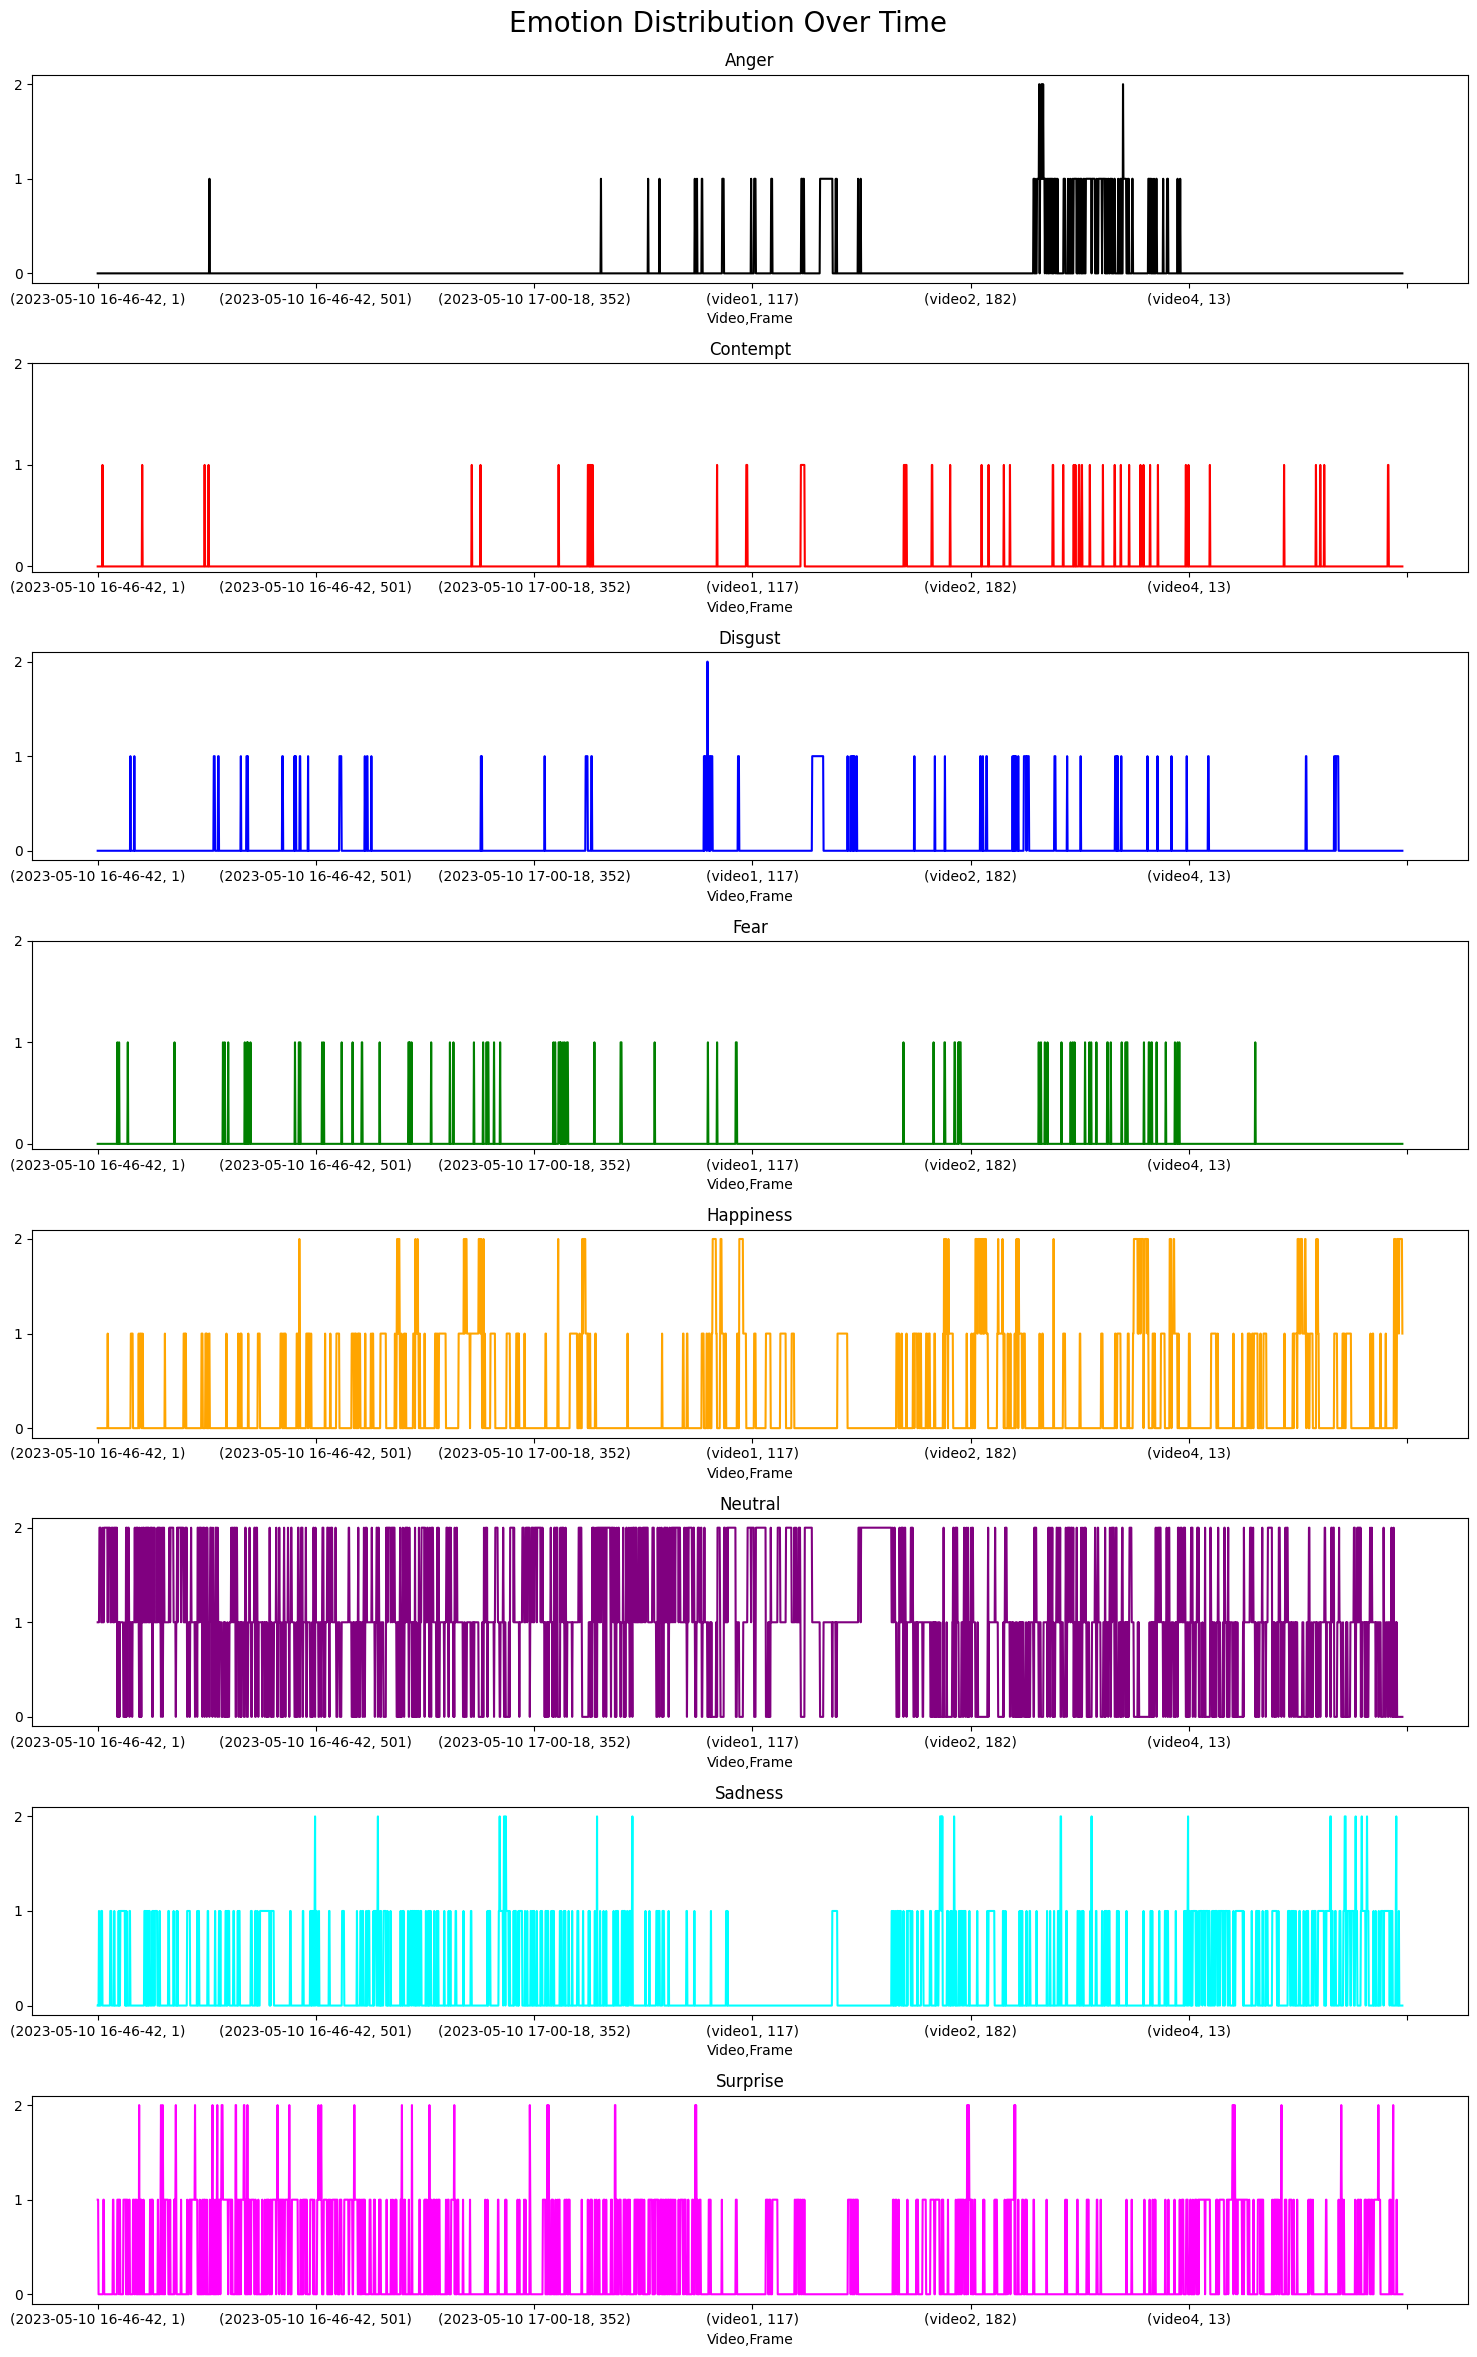

In [42]:
import matplotlib.pyplot as plt
# Assuming Frame is a measure of time
df['Frame'] = pd.to_numeric(df['Frame'], errors='coerce')

# Sort by frame
df = df.sort_values(by=['Frame'])

# Group by Video and Frame to see the distribution of emotions at each time point
emotion_timeline = df.groupby(['Video', 'Frame', 'Emotion']).size().unstack().fillna(0)


fig, axes = plt.subplots(nrows=len(emotion_timeline.columns), figsize=(15, 3 * len(emotion_timeline.columns)))
plt.suptitle('Emotion Distribution Over Time \n', fontsize=20)
# Define a list of colors for each emotion
colors = ['black', 'red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

for i, emotion in enumerate(emotion_timeline.columns):
    emotion_timeline[emotion].plot(ax=axes[i], title=emotion, color=colors[i])
    axes[i].set_yticks([0, 1, 2])

fig.tight_layout()
plt.show()

